<a href="https://colab.research.google.com/github/its-harshitgoel/Aerofit-Project/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")


In [ ]:
df


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


**Basic Metrics**

In [ ]:
df.shape


(180, 9)

In [ ]:
df.columns


Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
df.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Missing Value Detection**

In [ ]:
df.isnull().any()


Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

**Value counts and unique attributes**

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
productCounts = df['Product'].value_counts()
genderCounts = df['Gender'].value_counts()
maritalStatusCounts = df['MaritalStatus'].value_counts()

In [ ]:
productCounts

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
genderCounts

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
maritalStatusCounts

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df.groupby('Product')['Usage'].sum()

Product
KP281    247
KP481    184
KP781    191
Name: Usage, dtype: int64

In [ ]:
df['Age'].unique().size

32

In [ ]:
df2=df.copy()
df2['Age_group']=df.Age

df2.Age_group = pd.cut(df.Age, bins=[0,20,35,45,60],labels=['Teenage','Adult','Middle','Old'])
age_counts=df2['Age_group'].value_counts()
age_counts

Adult      142
Middle      22
Teenage     10
Old          6
Name: Age_group, dtype: int64

In [ ]:
df2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Teenage
1,KP281,19,Male,15,Single,2,3,31836,75,Teenage
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teenage
3,KP281,19,Male,12,Single,3,3,32973,85,Teenage
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teenage


**Statistical Summary**

In [ ]:
normalise_count = df[['Product', 'Gender', 'MaritalStatus','Fitness','Usage']].melt()
percentage=(normalise_count.groupby(['variable', 'value'])[['value']].count() / len(df)*100).round(2)
percentage

value
variable      value           
Fitness       1           1.11
              2          14.44
              3          53.89
              4          13.33
              5          17.22
Gender        Female     42.22
              Male       57.78
MaritalStatus Partnered  59.44
              Single     40.56
Product       KP281      44.44
              KP481      33.33
              KP781      22.22
Usage         2          18.33
              3          38.33
              4          28.89
              5           9.44
              6           3.89
              7           1.11

**VISIUAL ANALYSIS**

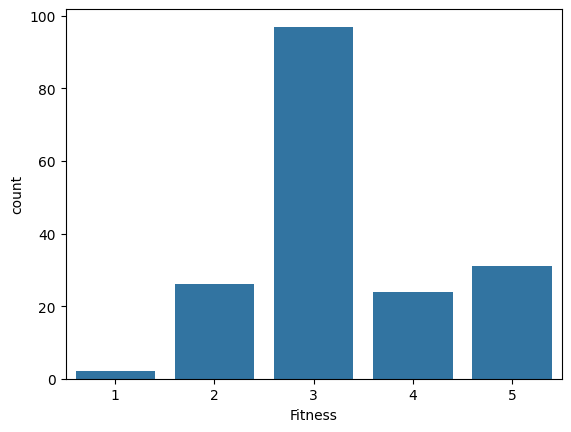

In [ ]:
sns.countplot(data=df,x='Fitness')
plt.show()



More than 90 customers have rated their physical
fitness rating as Average

Excellent shape is the second highest rating provided by the customers



<Axes: >

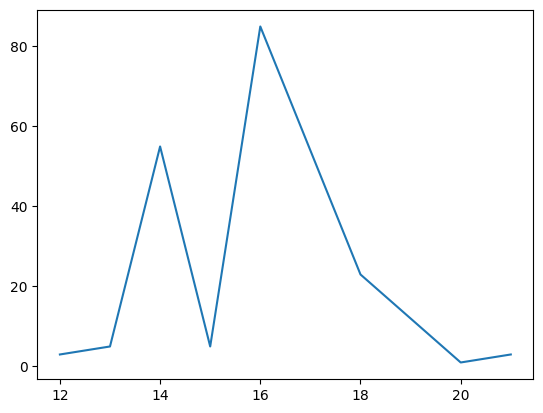

In [ ]:
df["Education"].value_counts().sort_index().plot(kind="line")


[]

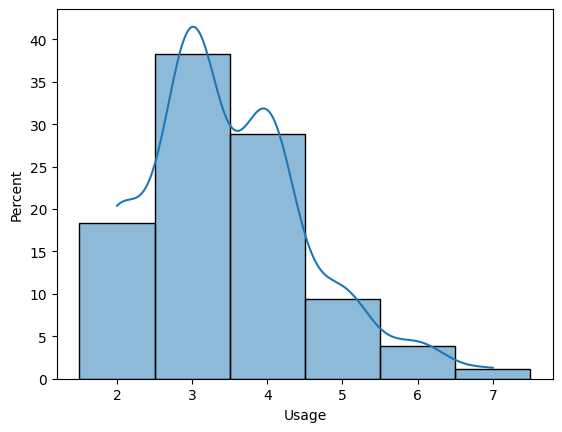

In [ ]:
sns.histplot(data = df, x = 'Usage', kde = True, stat = 'percent', discrete = True)
plt.plot()

<Axes: ylabel='Frequency'>

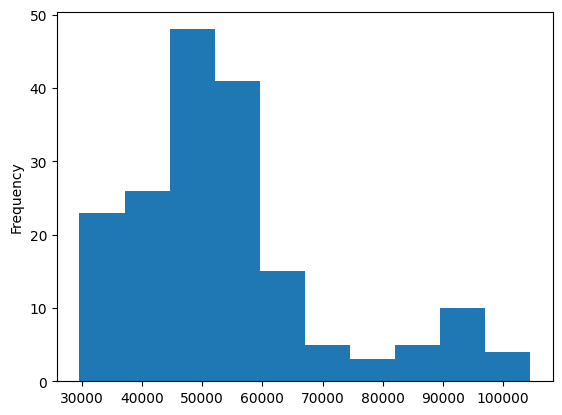

In [ ]:
df["Income"].plot(kind="hist")



**For correlation: Heatmaps, Pairplots**

[]

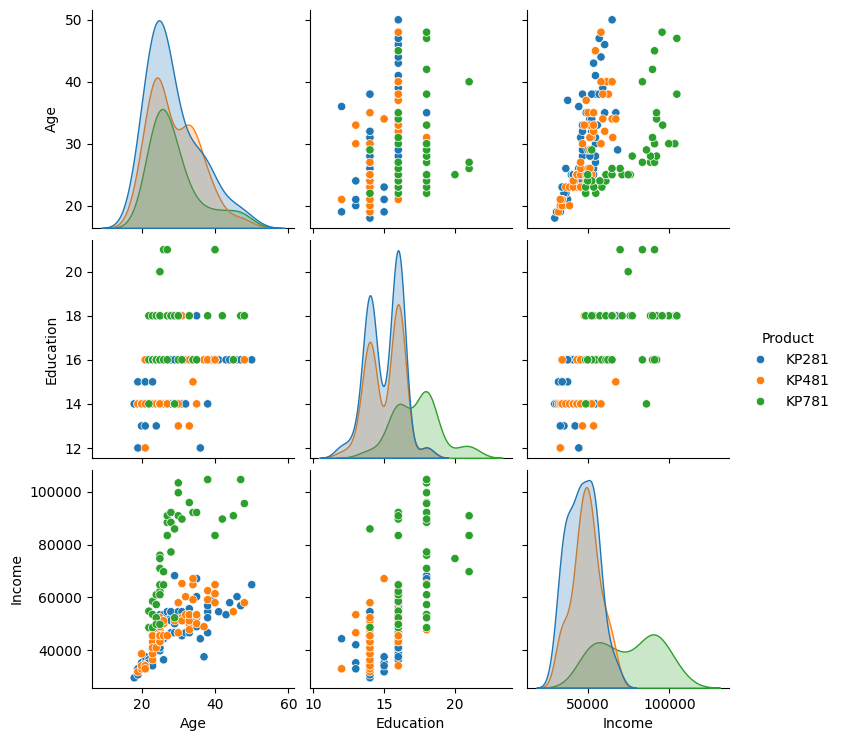

In [ ]:
sns.pairplot(data = df[['Product','Age','Education','Income']], hue='Product')
plt.plot()

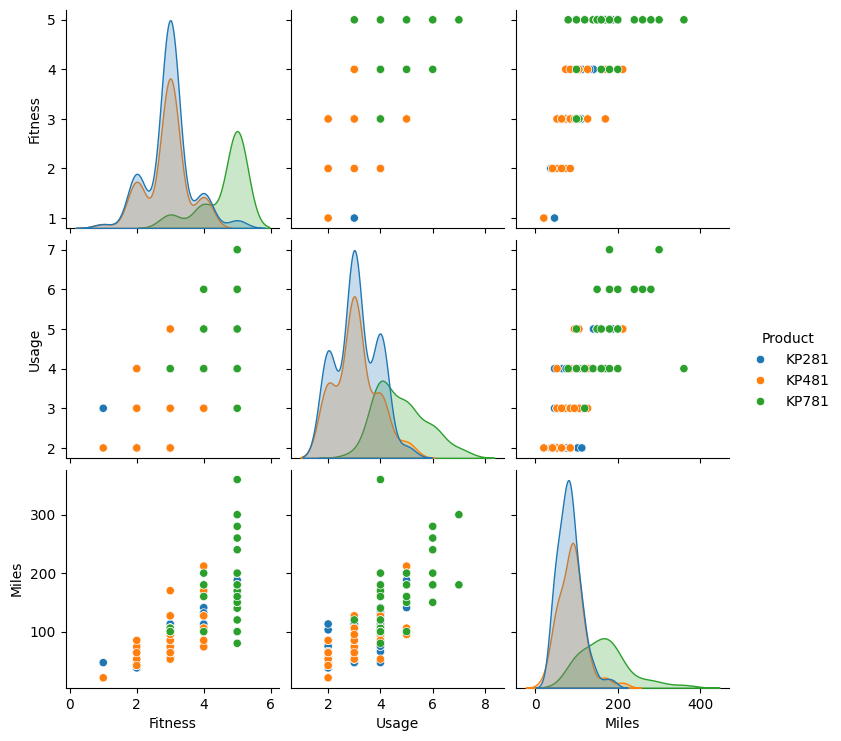

In [ ]:
sns.pairplot(data=df[['Fitness','Usage','Miles','Product']], hue='Product')
plt.show()

<ipython-input-109-61e75ded43ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


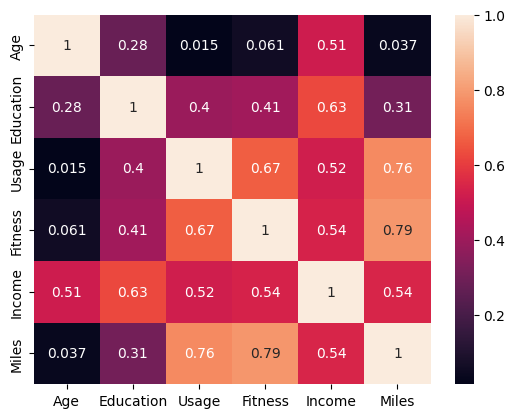

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()


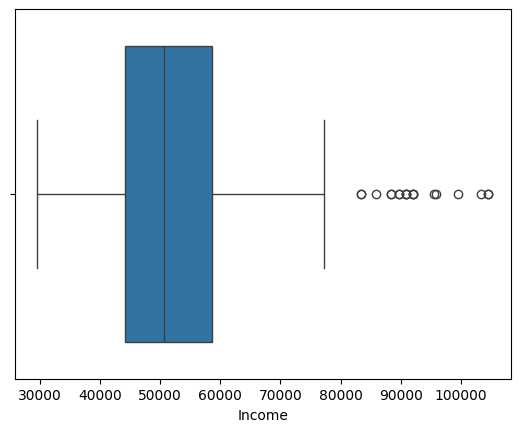

In [ ]:
sns.boxplot(data = df, x = 'Income')
plt.show()

Coorelation between measurable quantities


[]

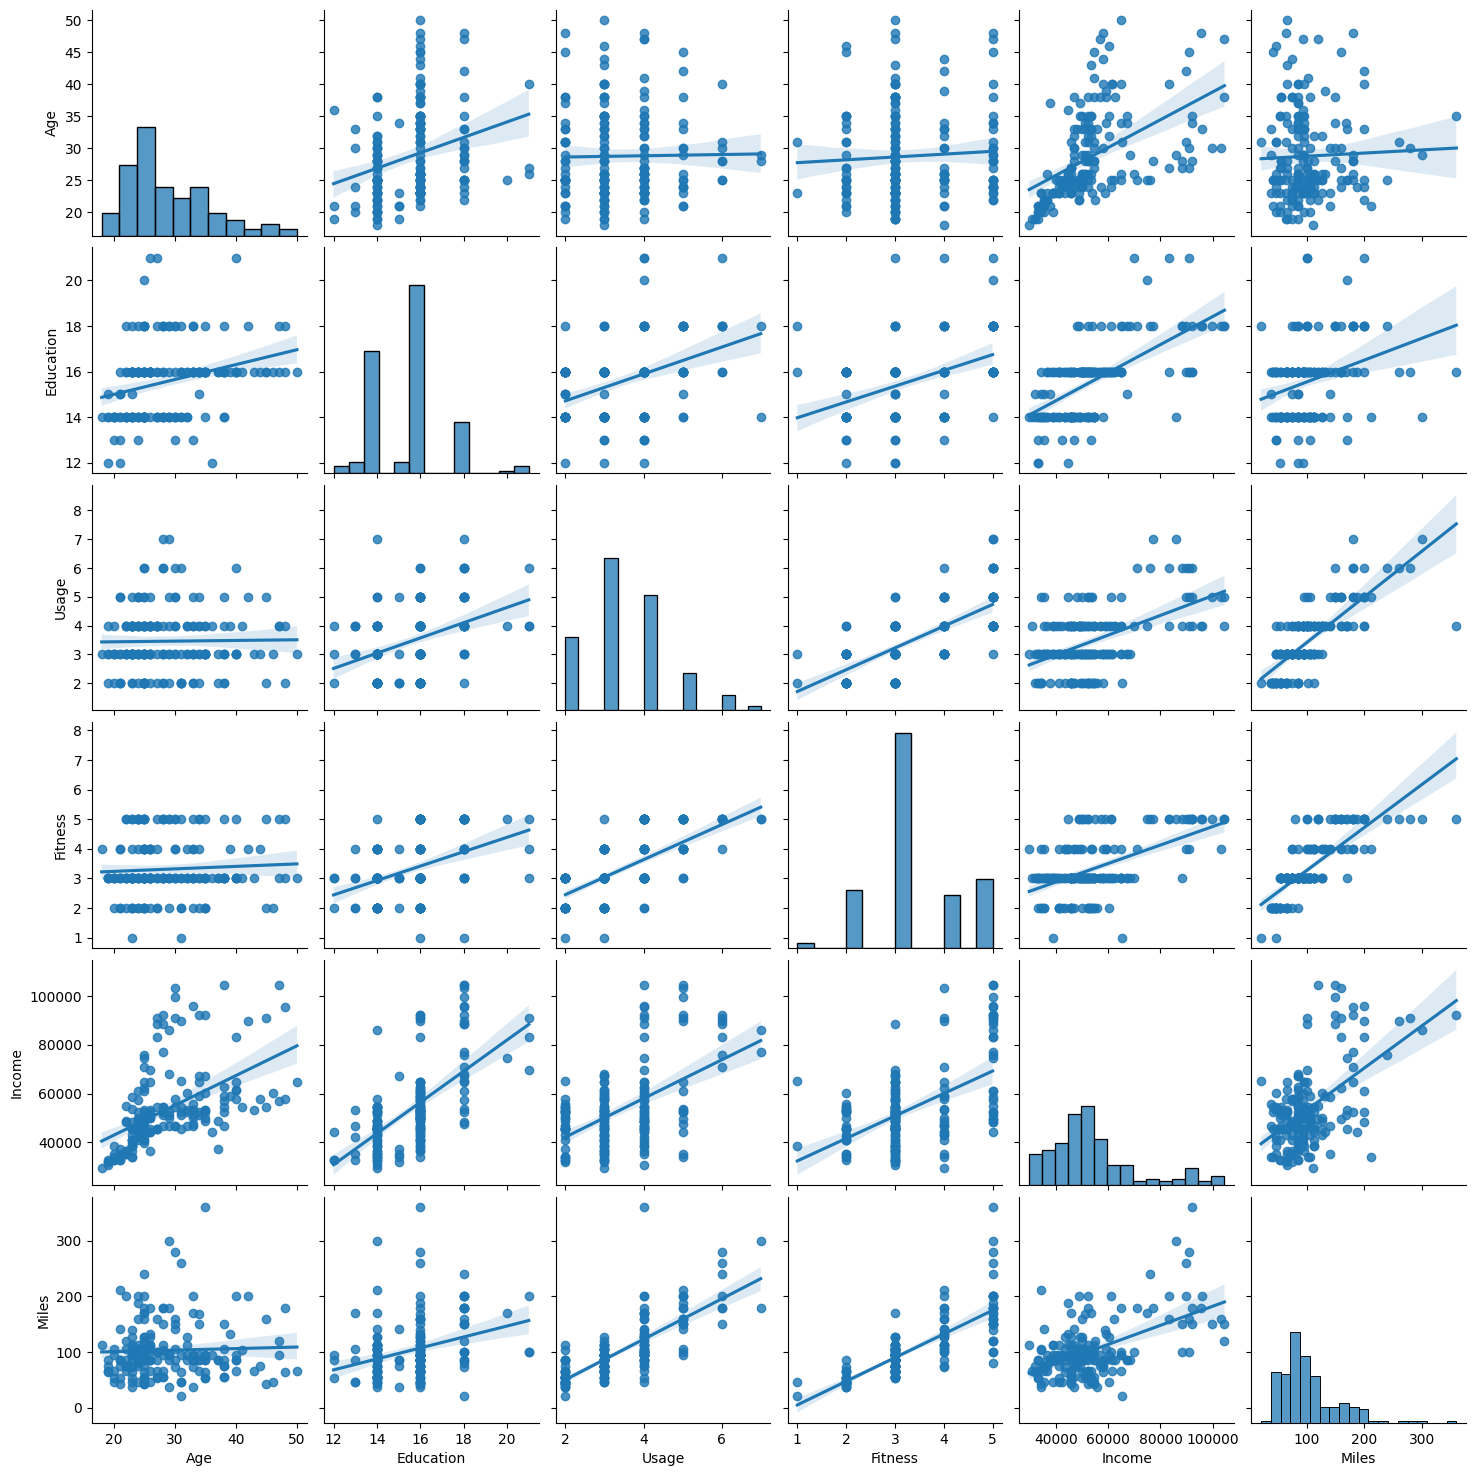

In [ ]:
sns.pairplot(data = df, kind = 'reg')
plt.plot()

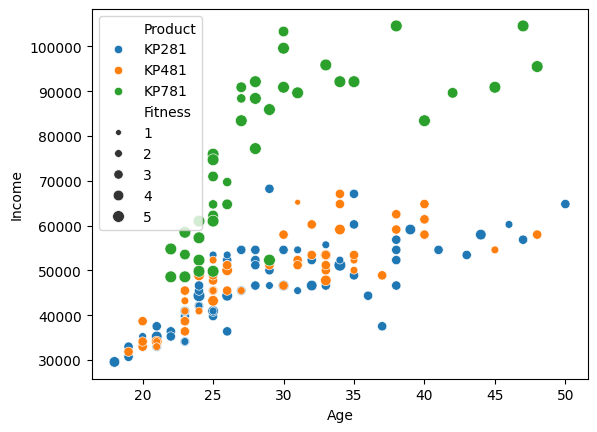

In [ ]:
sns.scatterplot(data = df, x= 'Age', y = 'Income', hue = 'Product', size = 'Fitness')
plt.show()


The customers having high annual income and high fitness scale generally buys KP781.

The customers having low fitness scale or low annual income generally buy KP281 and KP481.

**Customer Profiling - Categorization of users.**

**KP281 customer's profile**


* The customers who rate themselses 3 out of 5 in self rated fitness scale are more likely to invest in.
* Usage under 4days per week.
* Most of the customer who have purchased the product have rated Average shape as the fitness rating
* Income range between 39K to 53K have preferred this product.
* The customers having low fitness scale or low annual income.
* Probability increased from 44.44% to 58.7%, if customer is Female and Partnered.
* Younger to Elder beginner level customers prefer this product.
* Customers who educated under 16 years most preferable.

**KP481 customer's profile**
* This is an Intermediate level Product.
* Usage under 4days per week.
* Fitness Level of this product users varies from Bad to Average Shape depending on their usage.
* Average distance covered in this product is from 70 to 130 miles per week.
* Customers Prefer this product mostly to cover more miles than fitness.
* Less to medium earning customers.
* Average Income of the customer who buys KP481 is 49K.
* Male customers who partnered prefer more than Male customers who single.
*It has almost similar customer's profile like KP281, but KP281 is wide range of customers than KP481.


**KP781 customer's profile**

* 82.5% of them are males rest are females.
* Among all female customers, only 9.21 % buy KP781
* Customer walk/run average 120 to 200 or more miles per week
* 90 % of them had fitness scales 4 or 5. Only 10 % of them had average body shape.
* Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.
* Usage more than 4 days per week.
* Customers who educated more than 16 years.
the customer has the annual income in range '> 80k' is 100.0%
* This product is preferred by the customer where the correlation between Education and Income is High.

**Insights**

* Product KP281 brings in the highest revenue, KP481 and KP781 come next in line respectively
* Majority of the customers are in the age group of 22-33 years
~60-40% distribution of the male and female product buyers
* Majority of the buyers spend 14, 16, 18 years on their education
~60-40% distribution of the single and partnered product buyers
* Most of the users use the treadmill 3-4 times a week
* Majority of the users earn between 35000 to 60000 annually



**Recommendations**

* A better, high-end, premium product for highly-educated, high income and active customers to increase revenue.
* Because KP781, a premium product, is favored by males who are high earners and use it more frequently, we can target this demographic with similar products and also introduce them to upcoming premium offerings.
* Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more
* As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes. KP781 product should be promotted using influencers and other international atheletes.
* Since KP281 and KP481 also brings in significant revenue and is prefered by young & learnings individuals, added features and specialized discounts could help boost sales.
* Since KP281 is the best-selling product, we can boost the promotion of KP481 products and potentially introduce a no-cost EMI option to encourage sales.
